# Calculating Adiabatic Flame Temperature
*James L Urban, Daniel I Pineda and Carlos Fernandez-Pello*, 2017

### Adiabatic Flame Temperature
In this example, we go over the concept of adiabatic flame temperature. For the purposes of this example, the adiabtic flame temperature is the temperature of a system at chemical and thermodynamic equilibrium. The initial state in our case is a collection of reactants (fuel and oxidizer) at a specified temperature and pressure. The Cantera functions used in this example act to minimize the Gibbs free energy of the system. 

### Import Packages
- [cantera](http://www.cantera.org/docs/sphinx/html/index.html): A Combustion Chemistry Python Module 
    - Chemical Equilibrium
    - 1-D Flame Speed
    - Surface Chemistry
- [numpy](http://www.numpy.org/): A Mathematical Function Libary (similiar functions to MATLAB) 
    - Linear Algegra
    - Root Finding
    - Simple Data Analysis
- [matplotlib](http://matplotlib.org/): A Python Figure making and Plotting Software 

In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### Intitialize Gas Object
For this example we will initialize a gas object ("`gas1`") using the [GRI-MECH 3.0 mechanism](http://combustion.berkeley.edu/gri-mech/version30/text30.html), which is a chemical kinetic mechanism optimized for natural gas combustion.

Though the adiabatic flame temperature calculation is a thermodynamic calculation only and needs no information about possible reactions or reaction rates, we need a Cantera mechanism to know what species can possibly exist along with their thermodynamic data. 

In [2]:
gas1 = ct.Solution('gri30.xml')

### Set Initial Gas Mixture and Conditions
The gas mixture we will first examine will be a mixture with the following conditions:
- Composition: Stoichiometric methane ($CH_4$) and air
- $T = 300~K$
- $P = 101.325~kPa$

the "`gas1()`" command prints out information about the initial state of the fuel/air mixture, include the internal energy, enthalpy, density, and other properties which you can see in the output below

In [13]:
gas1.TP = 300, 101325   # [K], [Pa]
phi = 1
gas1.set_equivalence_ratio(phi,'CH4','O2:1,N2:3.76')
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.15084  kg/m^3
  mean mol. weight         28.3305  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      4.9593e+06        1.405e+08     J
   internal energy      4.8713e+06         1.38e+08     J
           entropy          7353.2        2.083e+05     J/K
    Gibbs function      2.7534e+06          7.8e+07     J
 heat capacity c_p          1357.6        3.846e+04     J/K
 heat capacity c_v          1064.2        3.015e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.384615         0.434416         -25.6292
              C2H2       0.615385         0.565584          66.8365
     [  +51 minor]              0                0



### Allow Gas Mixture to Equilibrate
In order to get the adiabatic flame temperature we need to react the fuel/air mixture, we can do that with the "`gas1.equilibrate('HP')`" command which will react the mixture to equilibrium while holding enthalpy and pressure constant.

Then we can print the temperature of the mixture which we can call using the command "`gas1.T`"

In [14]:
gas1.equilibrate('HP')
print "The adiabatic Flame Temperature {0:.2f} [K]".format(gas1.T)

The adiabatic Flame Temperature 2939.52 [K]


### Calculate Adiabatic Flame Temperature, $T_{adiabatic}$, for various equivalence ratios , $\phi$
The previous calculation of the adiabatic flame temperature was relatively simple. With some more effort we can calculate the adiabatic flame temperature for different equivalence ratios ($\phi$) which we can store in the vector "`phis`" by looping over the equivalence values and recording the temperature

In [5]:
gas1 = ct.Solution('gri30.xml')
phis = np.linspace(0,4,1000)
T_adiabatic = np.zeros_like(phis)
for l, phi in enumerate(phis):
    gas1.TP = 300, 101325
    gas1.set_equivalence_ratio(phi,'CH4','O2:2,N2:8')
    gas1.equilibrate('HP')
    T_adiabatic[l] = gas1.T

### Plot $T_{adiabatic}$ vs $\phi$

<IPython.core.display.Javascript object>


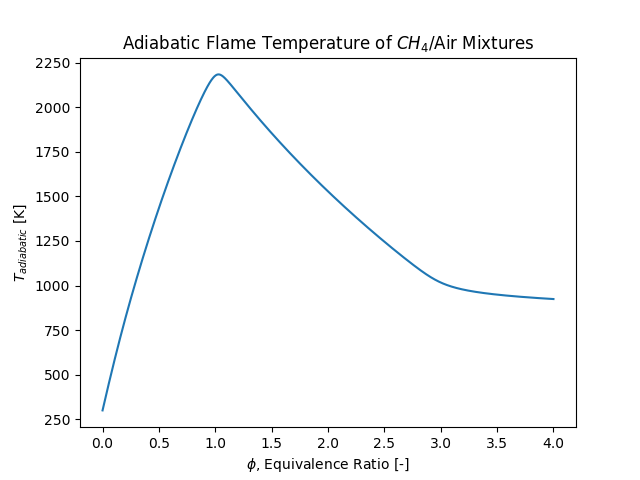

In [6]:
fig, ax = plt.subplots()
ax.set_title("Adiabatic Flame Temperature of $CH_4$/Air Mixtures")
ax.plot(phis,T_adiabatic)
ax.set_xlabel('$\phi$, Equivalence Ratio [-]')
ax.set_ylabel('$T_{adiabatic}$ [K]')
plt.show()

### Comments on the Plot of $T_{adiabatic}$ vs $\phi$

We can see that the highest flame temperature occurs near stoichiometric ($\phi =1$) and then gets lower as the equivalence ratio gets higher or lower 

## Other examples can be found at Cantera's website

Cantera (http://www.cantera.org/docs/sphinx/html/index.html)


## Try your own code below
 - What happens if you do not include Nitrogen (N2) and react as a pure Fuel/Oxygen mixture?
 - What happens if you react the mixture as constant volume process instead ('HV' instead of 'HP')?
 